In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path1 = '/content/drive/MyDrive/MVLAB_IMAGES/Ex-2images/2015_06287.jpg'
img_path2 = '/content/drive/MyDrive/MVLAB_IMAGES/Ex-2images/2015_06291.jpg'

### **3x3 MATRIX VISUALIZATION AND EQUALIZATION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure
from skimage.util import img_as_ubyte

In [ ]:
matrix_3x3 = np.random.randint(0, 256, (3, 3))
equalized_matrix1 = exposure.equalize_hist(matrix_3x3)

In [ ]:
matrix_3x3 = img_as_ubyte(matrix_3x3)
equalized_matrix1 = img_as_ubyte(equalized_matrix1)

/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:576: UserWarning: Downcasting int64 to uint8 without scaling because max value 225 fits in uint8
  return _convert(image, np.uint8, force_copy)


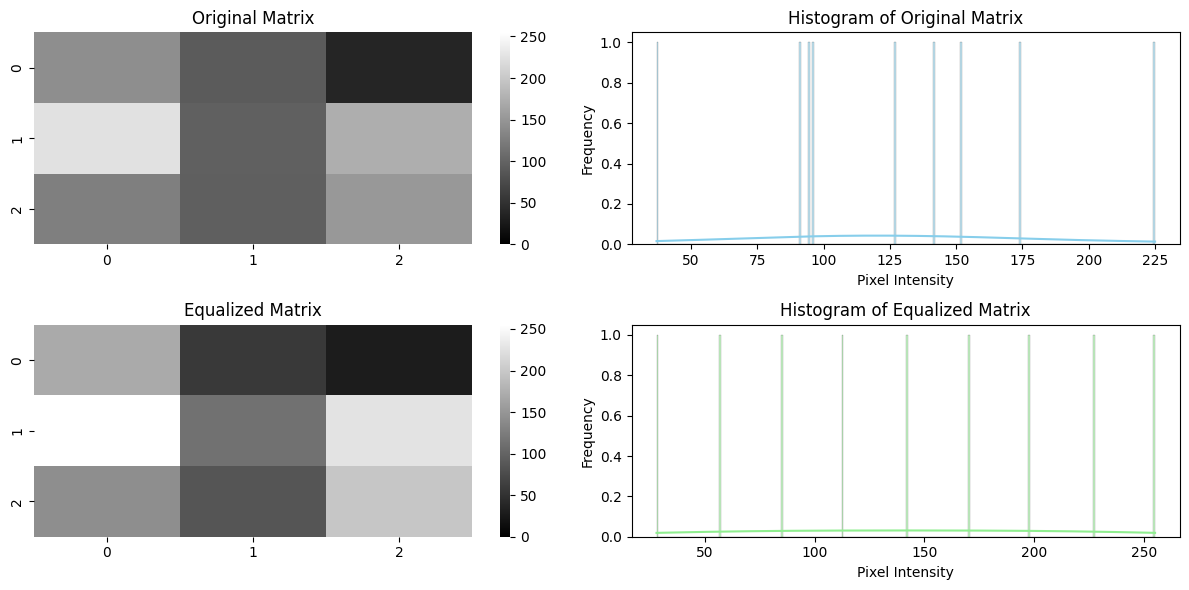

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.heatmap(matrix_3x3, ax=axes[0, 0], cmap='gray', cbar=True, vmin=0, vmax=255)
axes[0, 0].set_title("Original Matrix")

sns.histplot(matrix_3x3.flatten(), bins=256, kde=True, ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_title("Histogram of Original Matrix")
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

sns.heatmap(equalized_matrix1, ax=axes[1, 0], cmap='gray', cbar=True, vmin=0, vmax=255)
axes[1, 0].set_title("Equalized Matrix")

sns.histplot(equalized_matrix1.flatten(), bins=256, kde=True, ax=axes[1, 1], color='lightgreen', edgecolor='black')
axes[1, 1].set_title("Histogram of Equalized Matrix")
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **5X5 MATRIX VISUALIZATION AND EQUALIZATION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure

In [ ]:
matrix_5x5 = np.random.randint(0, 256, (5, 5))
equalized_matrix2 = exposure.equalize_hist(matrix_5x5) * 255

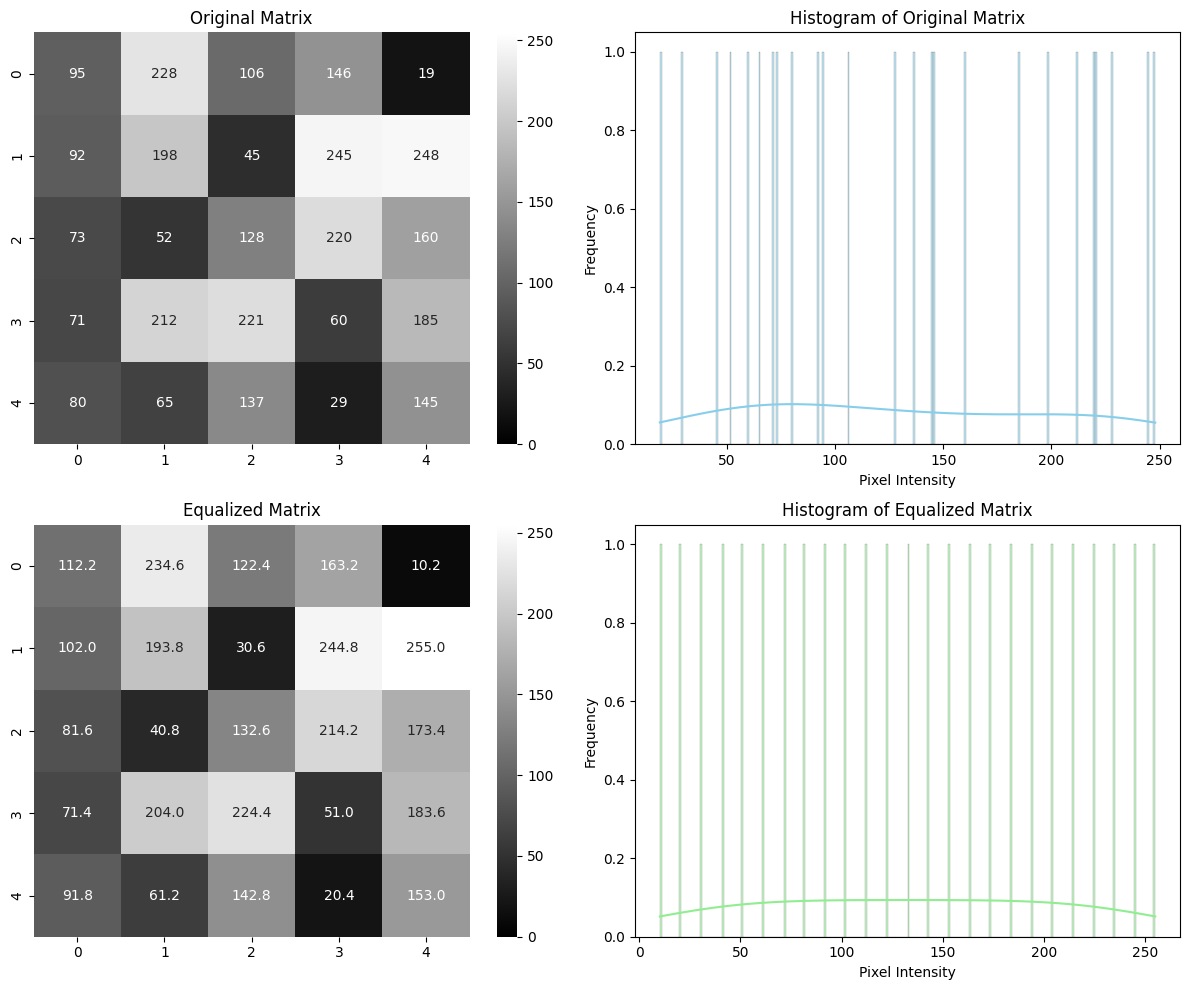

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(matrix_5x5, ax=axes[0, 0], cmap='gray', cbar=True, vmin=0, vmax=255, annot=True, fmt="d")
axes[0, 0].set_title("Original Matrix")

sns.histplot(matrix_5x5.flatten(), bins=256, kde=True, ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_title("Histogram of Original Matrix")
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

sns.heatmap(equalized_matrix2, ax=axes[1, 0], cmap='gray', cbar=True, vmin=0, vmax=255, annot=True, fmt=".1f")
axes[1, 0].set_title("Equalized Matrix")

sns.histplot(equalized_matrix2.flatten(), bins=256, kde=True, ax=axes[1, 1], color='lightgreen', edgecolor='black')
axes[1, 1].set_title("Histogram of Equalized Matrix")
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **GREY SCALE IMAGE EQUALIZATION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure, data
from skimage import exposure, io, img_as_ubyte

In [ ]:
image = io.imread(img_path1, as_gray=True)
image_uint8 = img_as_ubyte(image)
# equalized_image3 = exposure.equalize_hist(image) * 255
equalized_image3 = exposure.equalize_hist(image_uint8) * 255

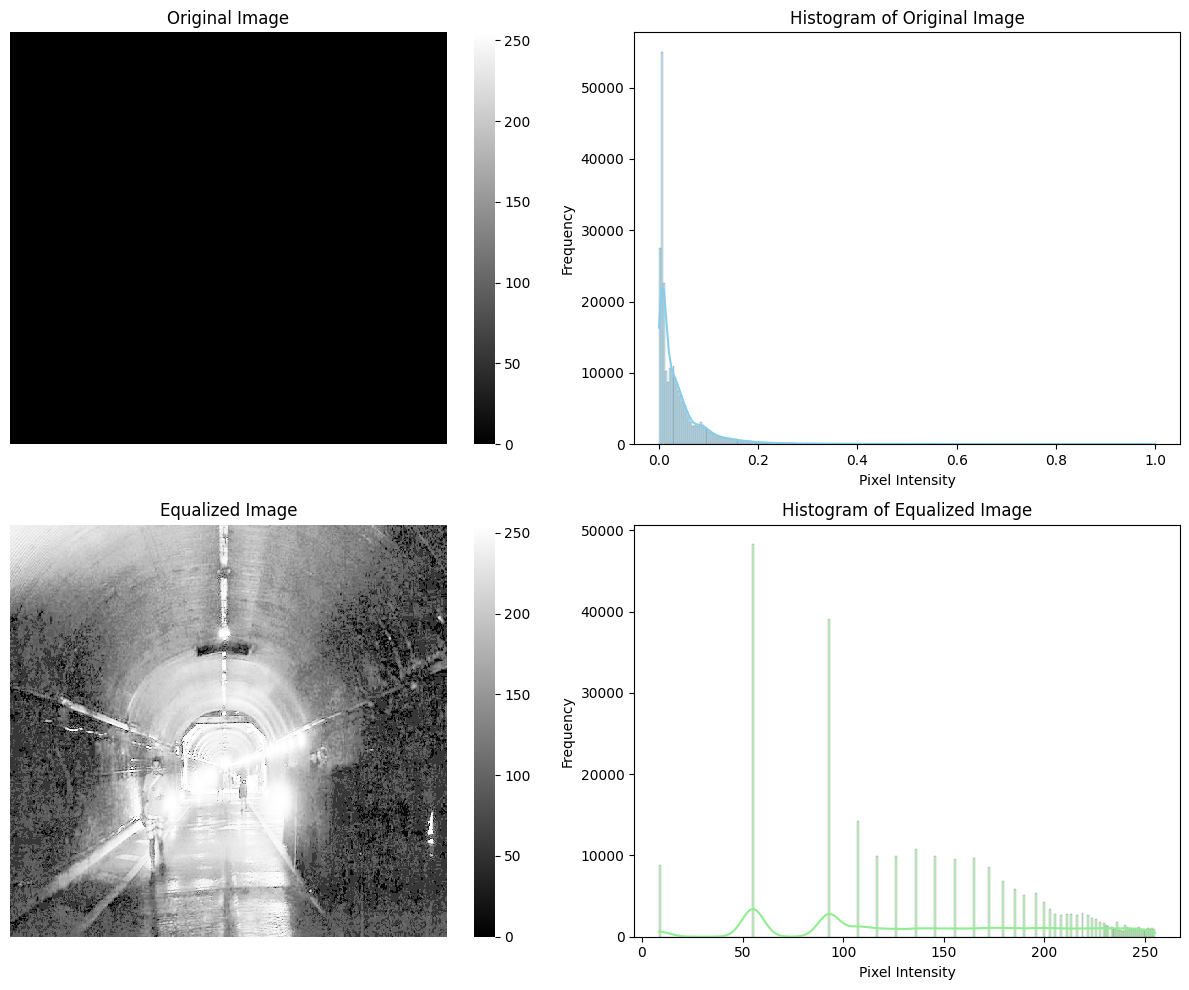

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(image, ax=axes[0, 0], cmap='gray', cbar=True, vmin=0, vmax=255, xticklabels=False, yticklabels=False)
axes[0, 0].set_title("Original Image")

sns.histplot(image.flatten(), bins=256, kde=True, ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

sns.heatmap(equalized_image3, ax=axes[1, 0], cmap='gray', cbar=True, vmin=0, vmax=255, xticklabels=False, yticklabels=False)
axes[1, 0].set_title("Equalized Image")

sns.histplot(equalized_image3.flatten(), bins=256, kde=True, ax=axes[1, 1], color='lightgreen', edgecolor='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### **COLOUR LIGHT WITH LOW LIGHT EQUALIZATION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure, data, color
from skimage import exposure, io, img_as_float, img_as_ubyte
from PIL import Image

In [ ]:
image_pil = Image.open(img_path2)
image = np.array(image_pil)

image_float = img_as_float(image)
hsv_image = color.rgb2hsv(image_float)
hsv_image[..., 2] = exposure.equalize_hist(hsv_image[..., 2])
equalized_image4 = color.hsv2rgb(hsv_image)

image4_uint8 = img_as_float(image)
equalized_image4_uint8 = img_as_float(equalized_image4)

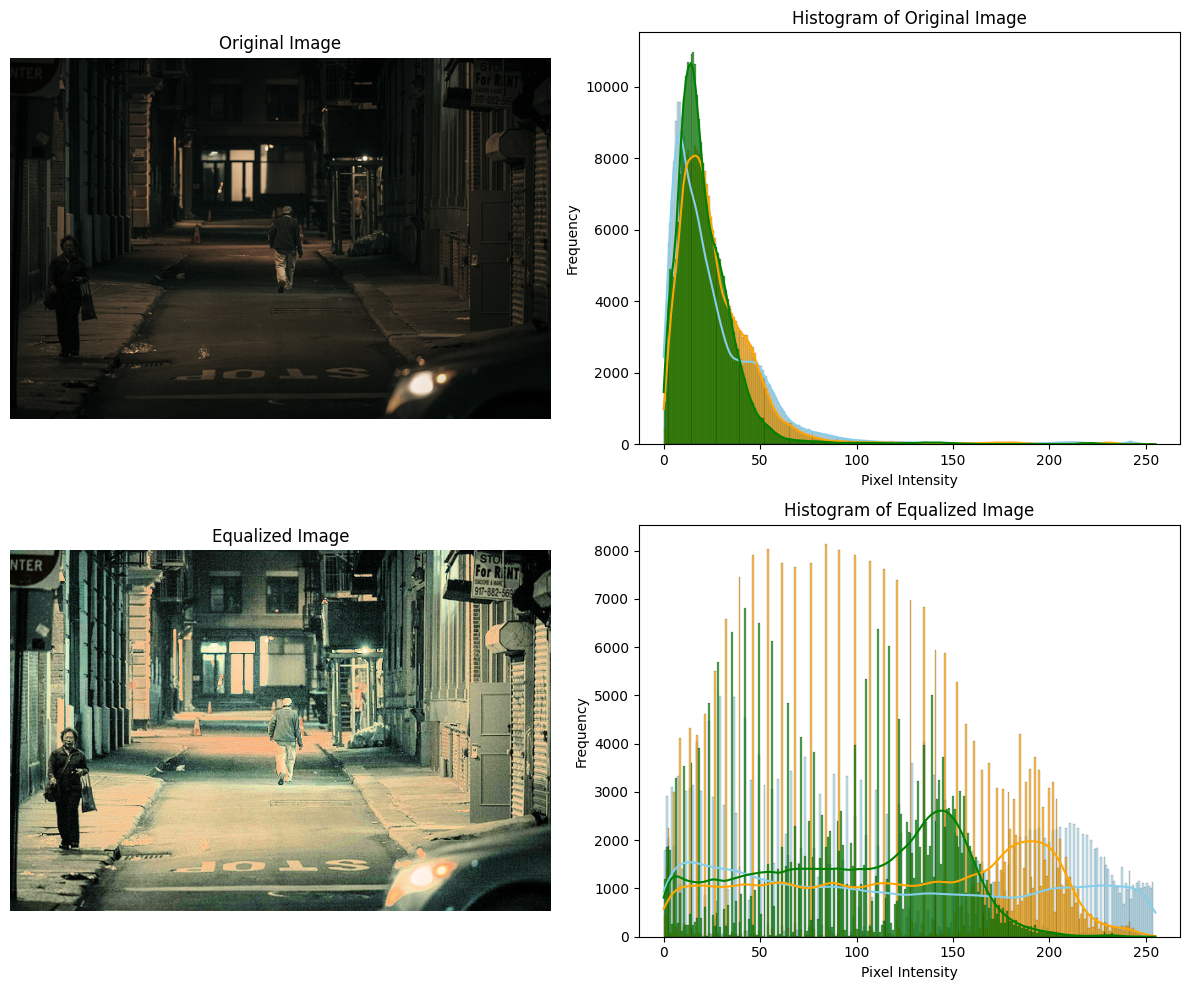

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(image)
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

sns.histplot(image[..., 0].flatten(), bins=256, kde=True, ax=axes[0, 1], color='skyblue', edgecolor='black')
sns.histplot(image[..., 1].flatten(), bins=256, kde=True, ax=axes[0, 1], color='orange', edgecolor='black', alpha=0.7)
sns.histplot(image[..., 2].flatten(), bins=256, kde=True, ax=axes[0, 1], color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].imshow(equalized_image4)
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis('off')

equalized_rgb_image = (equalized_image4 * 255).astype(np.uint8)
sns.histplot(equalized_rgb_image[..., 0].flatten(), bins=256, kde=True, ax=axes[1, 1], color='skyblue', edgecolor='black')
sns.histplot(equalized_rgb_image[..., 1].flatten(), bins=256, kde=True, ax=axes[1, 1], color='orange', edgecolor='black', alpha=0.7)
sns.histplot(equalized_rgb_image[..., 2].flatten(), bins=256, kde=True, ax=axes[1, 1], color='green', edgecolor='black', alpha=0.7)
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure, img_as_float, img_as_ubyte, color, data
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from skimage.measure import shannon_entropy
from scipy.stats import entropy as scipy_entropy
from math import sqrt
import pandas as pd
from PIL import Image

In [ ]:
def calculate_metrics(original, equalized, data_range, win_size=None, channel_axis=None):
    metrics = {}
    metrics['UIQI'] = ssim(original, equalized, data_range=data_range, win_size=win_size, channel_axis=channel_axis)
    metrics['Mean_Original'] = np.mean(original)
    metrics['Mean_Equalized'] = np.mean(equalized)
    metrics['STD_Original'] = np.std(original)
    metrics['STD_Equalized'] = np.std(equalized)
    metrics['PSNR'] = psnr(original, equalized, data_range=data_range)
    metrics['WPSNR'] = psnr(original, equalized, data_range=data_range)
    metrics['QRCM'] = (np.std(equalized) / np.std(original)) if np.std(original) != 0 else np.inf
    metrics['MSE'] = np.mean((original - equalized) ** 2)
    metrics['CNR'] = (np.mean(equalized) - np.mean(original)) / np.std(original)
    metrics['Entropy_Original'] = shannon_entropy(original)
    metrics['Entropy_Equalized'] = shannon_entropy(equalized)
    metrics['SSIM'] = ssim(original, equalized, data_range=data_range, win_size=win_size, channel_axis=channel_axis)
    metrics['IQI'] = ssim(original, equalized, data_range=data_range, win_size=win_size, channel_axis=channel_axis)
    metrics['ED'] = np.sqrt(np.sum((original - equalized) ** 2))
    metrics['RMSE'] = sqrt(metrics['MSE'])
    metrics['MI'] = scipy_entropy(original.flatten(), equalized.flatten())
    metrics['UIQ'] = ssim(original, equalized, data_range=data_range, win_size=win_size, channel_axis=channel_axis)
    metrics['AMBE'] = np.abs(np.mean(original) - np.mean(equalized))
    metrics['CEF'] = (np.std(equalized) / np.std(original)) if np.std(original) != 0 else np.inf
    metrics['PCQI'] = ssim(original, equalized, data_range=data_range, win_size=win_size, channel_axis=channel_axis)
    return metrics

In [ ]:
def resize_equalized_to_original(original, equalized):
    if original.shape != equalized.shape:
        equalized_resized = np.resize(equalized, original.shape)
        return equalized_resized
    return equalized

equalized_matrix_3x3 = resize_equalized_to_original(matrix_3x3, equalized_matrix1)
equalized_matrix_5x5 = resize_equalized_to_original(matrix_5x5, equalized_matrix2)
equalized_image_grayscale = resize_equalized_to_original(image_uint8, equalized_image3)
equalized_image_color_float = resize_equalized_to_original(hsv_image, equalized_image4_uint8)

In [ ]:
results = {
    "3x3 Matrix": calculate_metrics(matrix_3x3, equalized_matrix1, data_range=255, win_size=3),
    "5x5 Matrix": calculate_metrics(matrix_5x5, equalized_matrix2, data_range=255, win_size=5),
    "Grayscale Image": calculate_metrics(image_uint8, equalized_image3, data_range=255),
    "Color Image": calculate_metrics(image_float, equalized_image4, data_range=1.0, channel_axis=-1)
}

In [ ]:
df_results = pd.DataFrame(results).T
df_results

,UIQI,Mean_Original,Mean_Equalized,STD_Original,STD_Equalized,PSNR,WPSNR,QRCM,MSE,CNR,...,Entropy_Equalized,SSIM,IQI,ED,RMSE,MI,UIQ,AMBE,CEF,PCQI
3x3 Matrix,0.906172,126.555556,141.666667,51.685182,73.199879,18.399525,18.399525,1.416264,115.111111,0.292368,...,3.169925,0.906172,0.906172,32.186954,10.728985,0.019248,0.906172,15.111111,1.416264,0.906172
5x5 Matrix,0.991678,130.400000,132.600000,71.096554,73.553246,28.543445,28.543445,1.034554,90.936000,0.030944,...,4.643856,0.991678,0.991678,47.680185,9.536037,0.004937,0.991678,2.200000,1.034554,0.991678
Grayscale Image,0.069849,12.614161,136.786414,23.912468,66.038560,5.476214,5.476214,2.761679,18427.184667,5.192783,...,4.816990,0.069849,0.069849,69705.667295,135.746767,0.449216,0.069849,124.172253,2.761679,0.069849
Color Image,0.236437,0.099728,0.438525,0.093841,0.261528,8.112516,8.112516,2.786927,0.154436,3.610323,...,8.984829,0.236437,0.236437,355.826863,0.392983,0.072285,0.236437,0.338796,2.786927,0.236437


In [ ]:
df_results.to_csv('metrics_results.csv', index=False)